In [2]:
from sklearn.datasets import make_classification

In [7]:
#X- independent feature
#y- dependent feature
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.9],random_state=42)

In [8]:
X

array([[ 1.0735459 , -1.10133925],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [-2.15090138, -2.98937226],
       [ 2.45164689, -0.1566294 ],
       [ 3.64147835,  0.75692519]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [10]:
import pandas as pd


In [12]:
df1 = pd.DataFrame(X,columns=['f1','f2']) # input data frame
df2 = pd.DataFrame(y,columns=['target']) # output data frame
final_df = pd.concat([df1,df2],axis=1) # concatinating input and output data

In [17]:
final_df.head()

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [19]:
final_df['target'].value_counts()

,count
target,
0,896
1,104


In [20]:
## here i wants to plot datapoints
import matplotlib.pyplot as plt

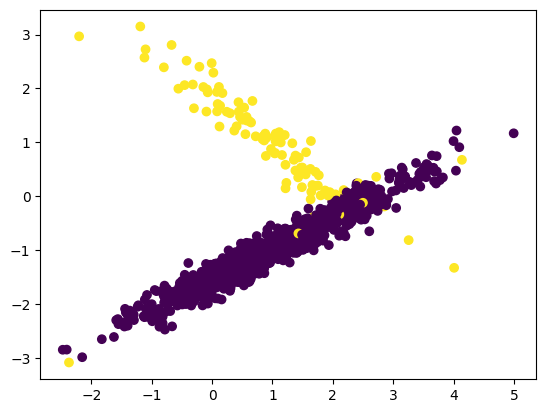

In [24]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

# Apply--  SMOTE

In [25]:
# first install library
!pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
### transform the dataset

oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [28]:
X.shape

(1792, 2)

In [30]:
y.shape

(1792,)

In [33]:
len(y[y==0])

896

In [34]:
len(y[y==1])

896

In [35]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversampled_df=pd.concat([df1,df2],axis=1)

In [38]:
oversampled_df['target'].value_counts()

,count
target,
0,896
1,896


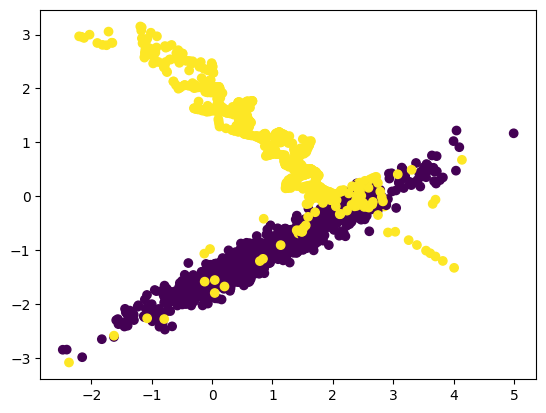

In [39]:
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df["target"])

**let's creat new dataframe for applying SMOTE**

In [40]:
import pandas as pd
import numpy as np


In [41]:
# seed tha dataframe for reduplicity
np.random.seed(123)

In [42]:
# creat tow classe for data frame

n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [43]:
# creat the dataframe
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [44]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [45]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [46]:
df['target'].value_counts()

,count
target,
0,900
1,100


**here let's try SMOT for balance the datapoints **

In [47]:
# frist import SMOTE from imblearn.over_sampling library
from imblearn.over_sampling import SMOTE

In [48]:
## second  transform the data
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(df[['feature_1','feature_2']],df['target'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [51]:
X_smote.shape

(1800, 2)

In [52]:
y_smote.shape

(1800,)

In [58]:
len(y_smote[y_smote==0])

900

In [59]:
len(X_smote[X_smote==0])

1800

In [60]:
df1 = pd.DataFrame(X_smote,columns=['feature_1','feature_2'])
df2 = pd.DataFrame(y_smote,columns=['target'])
oversampled_df = pd.concat([df1,df2],axis=1)

In [61]:
oversampled_df['target'].value_counts()

,count
target,
0,900
1,900


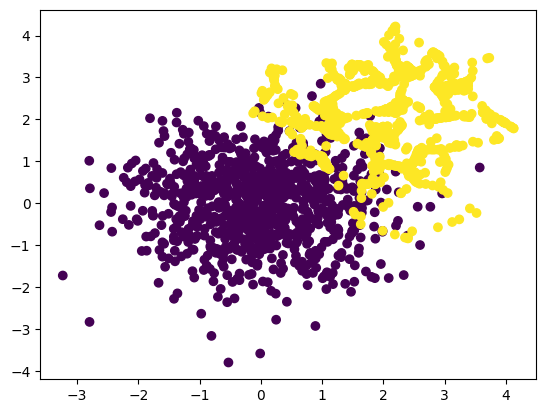

In [64]:
plt.scatter(oversampled_df['feature_1'],oversampled_df['feature_2'],c=oversampled_df['target'])

# let's creat data point with the help of from sklearn.datasets import make_classification

In [65]:
from sklearn.datasets import make_classification

In [103]:
A,b = make_classification(n_samples=100,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.9],random_state=42)

In [104]:
A

array([[ 1.22831184, -0.75717844],
       [ 0.69840909, -1.38029525],
       [ 1.55997333, -0.39798154],
       [ 0.57357881, -1.35297943],
       [ 0.58590018, -1.33745666],
       [ 0.63356167, -1.17278867],
       [ 0.55656344, -1.31038476],
       [ 1.19240467, -0.9095862 ],
       [ 1.32272135, -0.59340317],
       [ 1.42586898,  1.39002959],
       [ 0.63944087, -1.23395477],
       [ 1.2349949 , -0.73168763],
       [ 1.69575273, -0.43275454],
       [ 0.55250418, -1.27770387],
       [-0.23010779, -1.8686988 ],
       [ 1.00183089, -1.02646717],
       [ 1.03307436, -0.85545993],
       [ 0.10320711,  0.21791213],
       [ 0.57885884,  0.56599415],
       [-0.01217575, -1.79784109],
       [ 1.1586864 , -0.88167436],
       [ 0.00752479, -1.66848203],
       [ 1.88782031, -0.36699364],
       [ 1.83756944, -0.33355395],
       [ 0.54988111, -1.20911481],
       [ 1.21178021, -0.88487744],
       [ 0.79761627, -1.16053642],
       [ 0.85095512, -1.18455216],
       [-0.00832267,

In [105]:
b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [106]:
# now make dataframe

In [107]:
import pandas as pd

In [109]:
df1 = pd.DataFrame(A,columns=['f1','f2'])
df2 = pd.DataFrame(b,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)

In [110]:
final_df.head()

,f1,f2,target
0,1.228312,-0.757178,0
1,0.698409,-1.380295,0
2,1.559973,-0.397982,0
3,0.573579,-1.352979,0
4,0.585900,-1.337457,0


In [111]:
final_df['target'].value_counts()

,count
target,
0,91
1,9


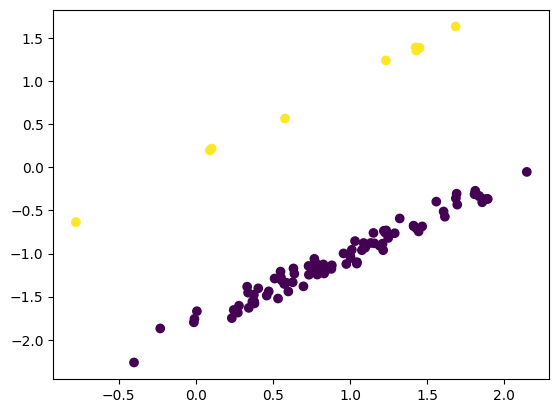

In [112]:
## let plot it
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [113]:
## noe apply  here SMOTE technique

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
smote=SMOTE()
A,b=smote.fit_resample(final_df[['f1','f2']],final_df['target'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [116]:
len(b[b==0])

91

In [117]:
len(b[b==1])

91

In [119]:
## now  convert it in Dataframe


df1 = pd.DataFrame(A,columns=['f1','f2'])
df2 = pd.DataFrame(b,columns=['target'])
oversampled_df1 = pd.concat([df1,df2])

In [120]:
oversampled_df1

,f1,f2,target
0,1.228312,-0.757178,NaN
1,0.698409,-1.380295,NaN
2,1.559973,-0.397982,NaN
3,0.573579,-1.352979,NaN
4,0.585900,-1.337457,NaN
...,...,...,...
177,NaN,NaN,1.0
178,NaN,NaN,1.0
179,NaN,NaN,1.0
180,NaN,NaN,1.0


In [121]:
oversampled_df1['target'].value_counts()

,count
target,
0.0,91
1.0,91


In [99]:
import seaborn as sns

<Axes: xlabel='f1', ylabel='f2'>

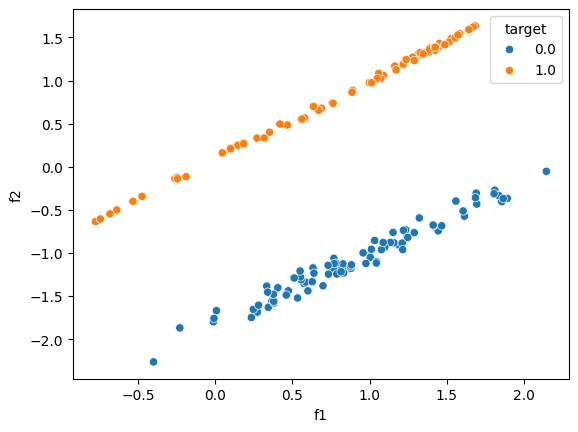

In [122]:
sns.scatterplot(x='f1',y='f2',hue='target',data=oversampled_df1)